In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("diabeties.csv")

In [3]:
df.head()

,pregnant,glocose,bp,skin,insulin,bmi,predigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   glocose    768 non-null    int64  
 2   bp         768 non-null    int64  
 3   skin       768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   predigree  768 non-null    float64
 7   age        768 non-null    int64  
 8   target     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

pregnant     0
glocose      0
bp           0
skin         0
insulin      0
bmi          0
predigree    0
age          0
target       0
dtype: int64

In [7]:
df.describe()

,pregnant,glocose,bp,skin,insulin,bmi,predigree,age,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# feature and target

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

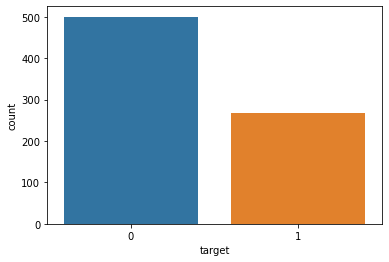

In [9]:
# target count
plt.figure()
sns.countplot(y)
plt.show()

In [10]:
df["target"].value_counts()

0    500
1    268
Name: target, dtype: int64

#### as we seen from above graph and value counts the count of having diabeties persons are less than person dont have diabeties

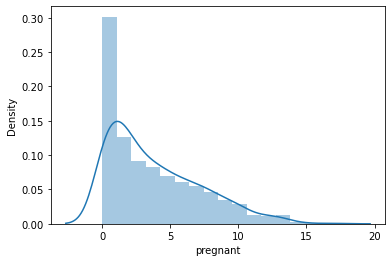

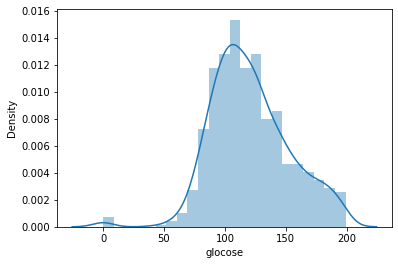

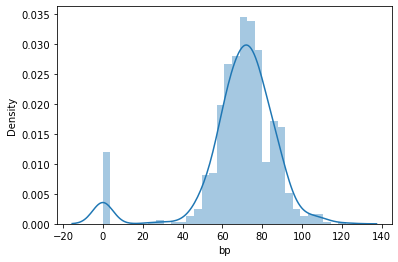

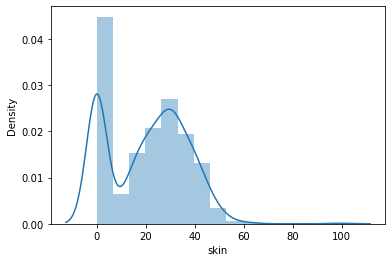

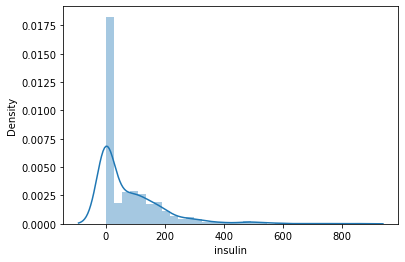

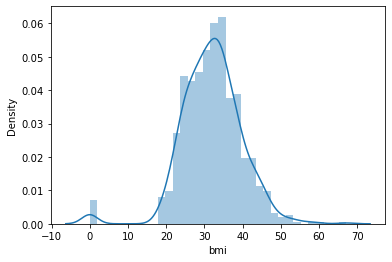

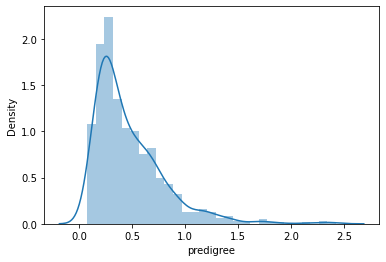

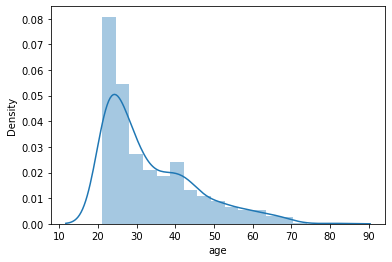

In [11]:
for col in X:
    plt.figure()
    sns.distplot(X[col])
    plt.show()

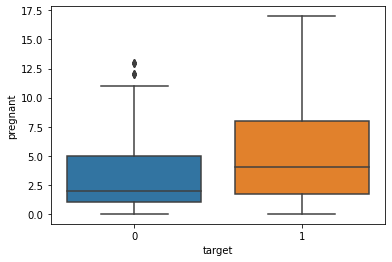

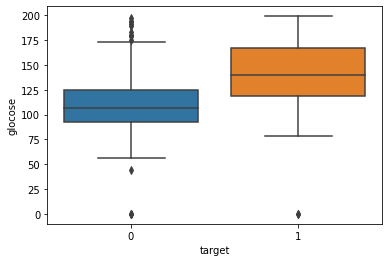

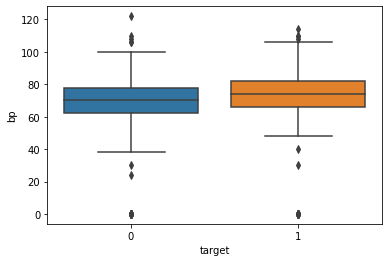

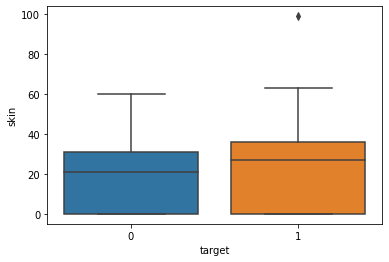

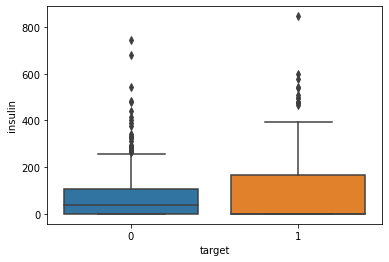

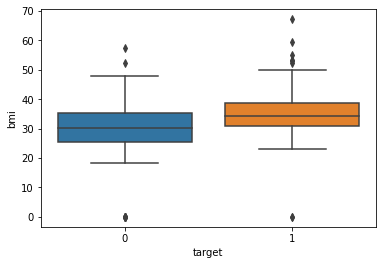

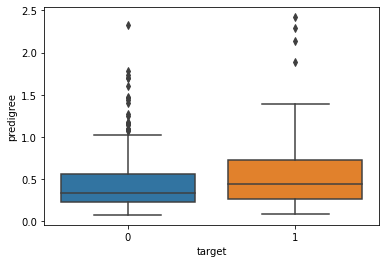

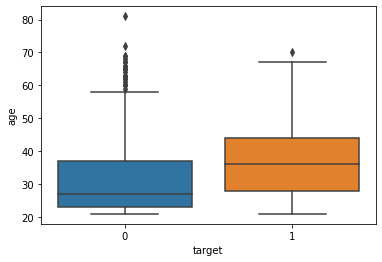

In [12]:
# feature target relationship and outliers
for col in X:
    plt.figure()
    sns.boxplot(data=df, x="target", y=col)
    plt.show()

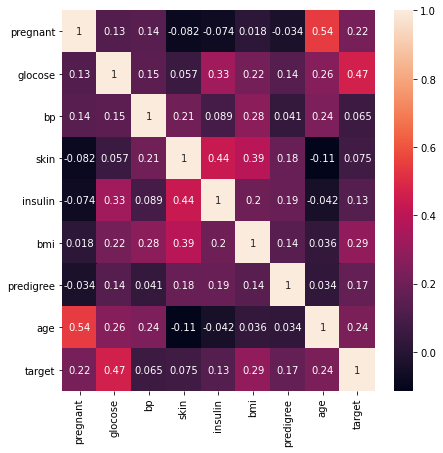

In [13]:
# multi-colinearity
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [14]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)


In [15]:
model = AdaBoostClassifier(n_estimators=100, random_state=1)
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [16]:
y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       146
           1       0.77      0.66      0.71        85

    accuracy                           0.80       231
   macro avg       0.79      0.77      0.78       231
weighted avg       0.80      0.80      0.80       231



# Gradient Boosting

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

In [18]:
model2 = GradientBoostingClassifier(random_state=1)
model2.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [19]:
y_pred = model2.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       146
           1       0.75      0.65      0.70        85

    accuracy                           0.79       231
   macro avg       0.78      0.76      0.77       231
weighted avg       0.79      0.79      0.79       231



# XG boosting

In [20]:
from xgboost import XGBClassifier

In [21]:
xgb = XGBClassifier(n_estimators=200,random_state=1)

In [22]:
xgb.fit(X_train,y_train)

[09:42:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [23]:
y_pred = xgb.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       146
           1       0.70      0.64      0.67        85

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.74       231
weighted avg       0.76      0.77      0.76       231

